# Heart Diseases Dataset Processing

This notebook goal is to:
* Reduce dimensionality
* Deal with the imbalance in the dataset
* Feature Engineering
* Any other necessary transformation
* last: train-test split. Always in mind to save the transformations map.


## TODO 

* [ ] Change race_x to bool 
* [ ] Outliers BMI
* [ ] Deal with the imbalance in the dataset
    * Look at parameters of SMOTE and TomekLinks
* [ ] Feature Engineering
    * Scaling
* [ ] Reduce dimensionality
* [ ] ???
* [ ] train-test split

Always in mind: 
Save transformation pickles (e.g. sklearn standardization object)

## Import libraries & data

In this section, we load the required libraries, the data, and also verify if the data was loaded correctly.

In [1]:
import os
from datetime import datetime
import logging
_NOTEBOOK_START = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
if not os.path.exists('logs'):
  # Create a new directory because it does not exist 
  os.makedirs('logs')
logging.basicConfig(filename=f'logs/heart_processing_{_NOTEBOOK_START}.log', encoding='utf-8', level=logging.DEBUG, format='%(levelname)s:%(asctime)s:%(message)s')

In [22]:
_TREAT_DATA_FOR_IMBALANCE = False
_LOAD_IMBALANCED_DATA = True if not _TREAT_DATA_FOR_IMBALANCE else False
_USE_IMBALANCE_DATASET = True

In [3]:
_ABSOLUTE_DIR = os.getcwd()
import typing

import numpy as np
import pandas as pd

## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder

## Imbalance
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

logging.info(f'Imports loaded')

In [4]:
dfHeart_preprocessed = pd.read_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_preprocessed.parquet')
logging.info(f'Load dataset from {_ABSOLUTE_DIR}/../artifacts/data/heart/heart_preprocessed.parquet')

In [5]:
## Confirm dataset is loaded
dfHeart_preprocessed

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,age_40-44_fe,age_45-49_fe,age_50-54_fe,age_55-59_fe,age_60-64_fe,age_65-69_fe,age_70-74_fe,age_75-79_fe,age_80orolder_fe,AgeCategory_seq_fe
0,False,16.60,True,False,False,3,30,False,1,True,...,0,0,0,1,0,0,0,0,0,8
1,False,20.34,False,False,True,0,0,False,1,True,...,0,0,0,0,0,0,0,0,1,13
2,False,26.58,True,False,False,20,30,False,0,True,...,0,0,0,0,0,1,0,0,0,10
3,False,24.21,False,False,False,0,0,False,1,False,...,0,0,0,0,0,0,0,1,0,12
4,False,23.71,False,False,False,28,0,True,1,True,...,1,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,True,27.41,True,False,False,7,0,True,0,False,...,0,0,0,0,1,0,0,0,0,9
319791,False,29.84,True,False,False,0,0,False,0,True,...,0,0,0,0,0,0,0,0,0,4
319792,False,24.24,False,False,False,0,0,False,1,True,...,0,1,0,0,0,0,0,0,0,6
319793,False,32.81,False,False,False,0,0,False,1,False,...,0,0,0,0,0,0,0,0,0,2


In [6]:
## Confirm dtypes
dfHeart_preprocessed.dtypes

HeartDisease                               bool
BMI                                     float64
Smoking                                    bool
AlcoholDrinking                            bool
Stroke                                     bool
PhysicalHealth                            int32
MentalHealth                              int32
DiffWalking                                bool
Sex                                       int64
PhysicalActivity                           bool
GenHealth                                 int64
SleepTime                                 int32
Asthma                                     bool
KidneyDisease                              bool
SkinCancer                                 bool
race_americanindian/alaskannative_fe      uint8
race_asian_fe                             uint8
race_black_fe                             uint8
race_hispanic_fe                          uint8
race_other_fe                             uint8
race_white_fe                           

V1: race_x is coming as uint8, which probably isn't the best way to have this column as.  
V2: 

In [7]:
if _TREAT_DATA_FOR_IMBALANCE:
    x_data = dfHeart_preprocessed[[column for column in dfHeart_preprocessed.columns if column != 'HeartDisease']]
    y_data = dfHeart_preprocessed['HeartDisease']

## Imbalanced data 

In this section, we treat the imbalance on the data. We use SMOTE and TomekLinks.  


We were guided by these tutorials:   
https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be  
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification  

We were having difficulties in using this method with the whole dataset. 


In [8]:
if _TREAT_DATA_FOR_IMBALANCE:
    ## Create SMOTE Class Object
    hrtSmote = SMOTE(sampling_strategy = 'minority', n_jobs=-1)
    
    ## Create TomekLinks Class Object
    hrtTomek = TomekLinks(sampling_strategy = 'majority', n_jobs=-1)
    
    X, y = hrtCombineSampling.fit_resample(x_data, y_data)
    # The result is a dataset with 582.701 observations
    # Takes about 3 hours and half to run.
    
    # Observation ID 317695 is the last real observation.
    # Known by the fact it's the last two decimal digits BMI observation.

In [18]:
if _TREAT_DATA_FOR_IMBALANCE:
    logging.info(f'Saving SMOTETOMEK Dataset')
    X['HeartDisease'] = y
    heartDisease_imbalance = X
    heartDisease_imbalance['FLAG_REAL'] = 0
    heartDisease_imbalance.loc[0:317695, 'FLAG_REAL'] = 1
    heartDisease_imbalance.to_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_smotetomek_1505222.parquet')
    
if _LOAD_IMBALANCED_DATA:
    heartDisease_imbalance = pd.read_parquet(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_smotetomek_1505222.parquet')

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

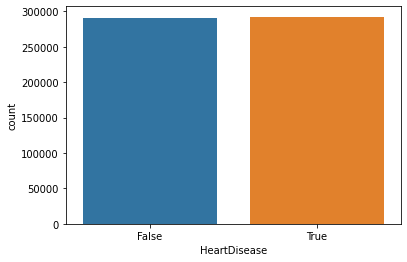

In [54]:
sns.countplot(x = heartDisease_imbalance['HeartDisease'])